# Sani Talukder
# Reg. no: 2017331023

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [53]:
t = np.arange(0.0,4.0,0.0001)

$$x(t) = A\sin(2\pi f t + phase)$$

In [54]:
def create_sinusoidal(t, A, f, phase = 0):
  x = A * np.sin(2.0 * np.pi* f * t + phase)
  return x

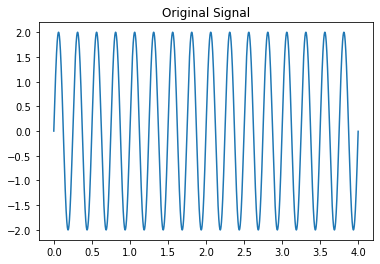

In [55]:
y1=create_sinusoidal(t,2,4)
plt.plot(t,y1)
plt.title('Original Signal')
plt.show()

**Sampling**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


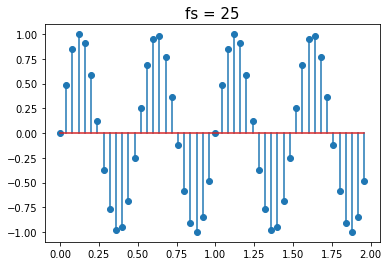

In [56]:
fs = 25
step = 1.0/fs
n = np.arange(0, 2.0, step)
y = create_sinusoidal(n, 1, 2)
plt.title('fs = 25', fontsize = 15)
plt.stem(n,y)
plt.show()

**Quantization**

In [57]:
b_bit = 4
L = 2 ** b_bit
vmax=2;
vmin=-2;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


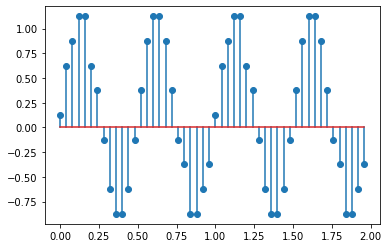

In [58]:
yq = np.copy(y)
encode = np.copy(y)

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(y)):
 
    if(i != len(partition) - 1 and left <= y[j] and y[j] < right):
      yq[j] = partition[i]
      encode[j] = i

    if(i == len(partition) - 1 and left <= y[j]):
      yq[j] = partition[i]
      encode[j] = i

for i in range(len(yq)):
    yq[i] = yq[i] + (delta / 2) 

plt.stem(n, yq)
plt.show()

**Encoding**

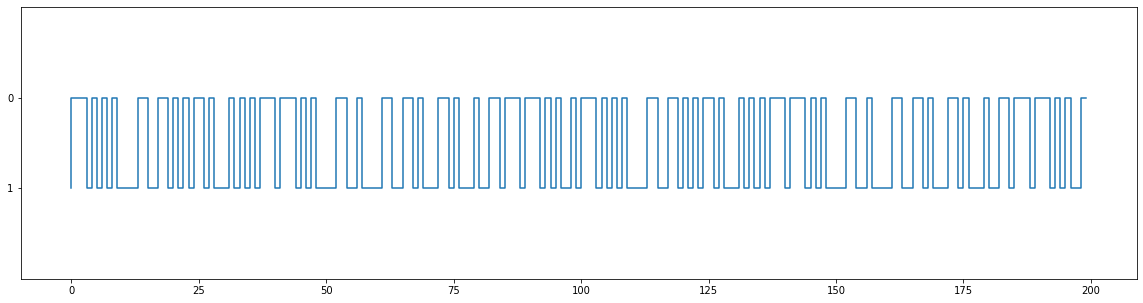

In [59]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))
plt.figure(figsize=(20, 5))
plt.ylim(-1, 2)
plt.step(pos, binary_codec)
plt.show()
